<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 04 - Implement a Quicksort Algorithm

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
from matplotlib import pyplot as plt
%matplotlib inline
VERBOSE = False
SEED = 213
random.seed = SEED

### Mount Google Drive to Colab Environment

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Base Code from book

In [2]:
def quick_sort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quick_sort(less) + [pivot] + quick_sort(greater)

### Create Test Array, Sort Copy of List, Assert Quick Sort

In [3]:
# test_list = get_random_list(10)
# sorted_list = test_list.copy()
# sorted_list.sort()
# assert quick_sort(test_list) == sorted_list,"List not properly sorted"

### Merge Sort

In [4]:
def merge_sort(mylist):
    if(VERBOSE):
        print('Splitting ', mylist)
    if len(mylist)>1:
        #find midpoint
        mid= len(mylist)//2
        l_half = mylist[:mid]
        r_half = mylist[mid:]
        #recursively split until only list only contains 1 element
        merge_sort(l_half)
        merge_sort(r_half)
        
        #Detect which side is smaller, iterating over the list
        i=0
        j=0
        k=0
        while i < len(l_half) and j < len(r_half):
            if l_half[i] < r_half[j]:
                mylist[k] = l_half[i]
                i += 1
            else:
                mylist[k]=r_half[j]
                j += 1
            k+=1
        
        while i < len(l_half):
            mylist[k]=l_half[i]
            i+=1
            k+=1
            
        while j < len(r_half):
            mylist[k] = r_half[j]
            j+=1
            k+=1
    
    if(VERBOSE):
        print('Merging', mylist)
    return mylist

### Bubble Sort

In [5]:
def bubble_sort(xlist):
    n = len(xlist)
    
    #Traverse array
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            #Traverse array from 0 to n-i-1
            #Swap if element found is greater than next element
            if xlist[j] > xlist[j+1]:
                xlist[j], xlist[j+1] = xlist[j+1], xlist[j]
    return xlist

### Insertion Sort

In [6]:
def insertion_sort(xlist):
    # Traverse list
    for i in range(1, len(xlist)):
        key = xlist[i]
        # Move elements of array[0..i-1] that are greater than key,
        # one position ahead of their current place
        j = i-1
        while j >= 0 and key < xlist[j]:
            xlist[j+1] = xlist[j]
            j-=1
        xlist[j+1] = key
    return xlist

### Create A List of United States

In [7]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
         'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
         'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
         'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
         'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

### Function to Generate Random Name, Based on Input Length

In [8]:
def generate_name(name_length):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    name = ''
    for i in range(name_length):
        name += random.choice(letters)
    return name
# Generate first and last name for a person in every state
people = []
for state in states:
    people.append({'first_name': generate_name(10),
                  'last_name': generate_name(10),
                  'state': state})

### Create Dataframe with Names and States

In [9]:
people_df = pd.DataFrame(data=people)

In [10]:
people_df.head(10)

,first_name,last_name,state
0,laxugtpgiy,azuoxmiurb,AL
1,smljkkdhml,rpkvbdbrpk,AK
2,fujpanpmor,inmtywvxrt,AZ
3,cdhajxuizc,vxloxprtpl,AR
4,keelohyexn,xrfnhhpgds,CA
5,wchveyjvyy,vsbrjjrhjv,CO
6,ozkedpqoqw,cgtbksrbou,CT
7,pvfndgpfqp,blcwuzqecf,DE
8,fhcckfhnzu,ynjulhcdxm,FL
9,ijbewtadje,lnrrcrrkqv,GA


### Shuffle Dataframe

In [11]:
people_df = people_df.sample(frac=1)
# Create copies of shuffled df for each sorting algorithm
dataframe_array = []
for i in range(4):
    dataframe_array.append(people_df.copy())

### Quicksort, Merge Sort, Bubble Sort, Insertion Sort  

In [12]:
quicksort_times = []
mergesort_times = []
bubblesort_times = []
insertionsort_times = []

# Quicksort
for col in people_df.columns:
    start_time = datetime.datetime.now()
    quick_sort(dataframe_array[0][col])
    quicksort_times.append((datetime.datetime.now() - start_time).
                 total_seconds() * 1000)
# Merge sort
#     start_time = datetime.datetime.now()
#     merge_sort(dataframe_array[0][col])
#     mergesort_times.append((datetime.datetime.now() - start_time).
#                  total_seconds() * 1000)

# Bubble sort
    start_time = datetime.datetime.now()
    bubble_sort(dataframe_array[1][col])
    bubblesort_times.append((datetime.datetime.now() - start_time).
                 total_seconds() * 1000)

# Insertion sort
    start_time = datetime.datetime.now()
    insertion_sort(dataframe_array[2][col])
    insertionsort_times.append((datetime.datetime.now() - start_time).
                 total_seconds() * 1000)

### Create Dataframe with Sort Times

In [13]:
sort_df = {'quick sort' : quicksort_times,
           'bubble sort' : bubblesort_times,
           #'merge sort': mergesort_times,
           'insertion sort' : insertionsort_times}
sort_df = pd.DataFrame(data=sort_df)
sort_df

,quick sort,bubble sort,insertion sort
0,1.803,110.545,60.182
1,0.337,118.516,56.711
2,0.344,16.958,6.307


### Graph Results

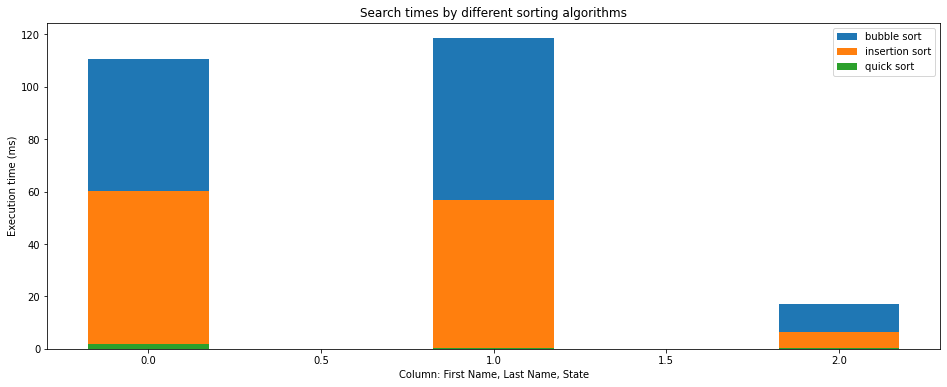

In [14]:
plt.figure(figsize=(16, 6))
plt.bar(sort_df.index, sort_df['bubble sort'], 0.35)
plt.bar(sort_df.index, sort_df['insertion sort'], 0.35)
plt.bar(sort_df.index, sort_df['quick sort'], 0.35)
plt.legend(('bubble sort', 'insertion sort', 'quick sort'))
plt.ylabel('Execution time (ms)')
plt.xlabel('Column: First Name, Last Name, State')
plt.title('Search times by different sorting algorithms');